In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [15]:
import os

paths = []  # Creating a list for paths

for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain_MRI_images'):
    for file in f:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            paths.append(os.path.join(r, file))


# Function to load and preprocess the image
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (240, 240))
    img = img.astype("float32") / 255.0
    img_noisy = 0.1* np.random.normal(0, 1, size=(240,240)) + img
    img_noisy=np.clip(img_noisy,0,1)
    return img,img_noisy

test_df=paths[2500:2600]


testset = [load_image(path)[0] for path in test_df]
testset_noisy = [load_image(path)[1] for path in test_df]

Img = testset[5]
img_noisy = testset_noisy[5]


In [16]:
# file1 = "/content/gdrive/MyDrive/brainmriii.jpg"
# img2 = cv2.imread(file1, cv2.IMREAD_GRAYSCALE)
# Img = cv2.resize(img2, (240,240))
# Img = Img/ 255.0
# import matplotlib.pyplot as plt
# plt.imshow(Img,cmap="gray")

In [17]:
# import numpy as np
# img_noisy = 0.3* np.random.normal(0, 1, size=Img.shape) + Img
# img_noisy=np.clip(img_noisy,0,1)
# plt.imshow(img_noisy,cmap="gray")

#MSE

In [18]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [19]:
#Denoising filters
#####################################################################
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd
from skimage.metrics import structural_similarity as ssim




#Gaussian

<ipython-input-21-74bc09744b82>:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  gaussian_cleaned_psnr = peak_signal_noise_ratio(Img, gaussian_img)


PSNR of cleaned image =  24.617350159110845
SSIM of cleaned image =  0.5269412094051169


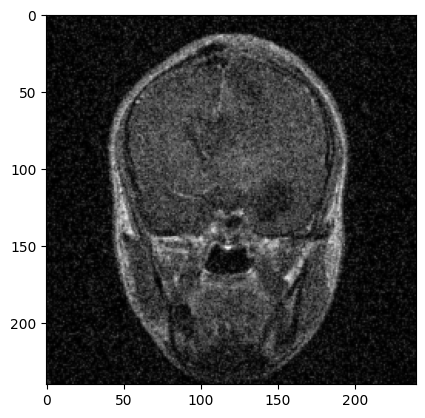

In [21]:
gaussian_img = nd.gaussian_filter(img_noisy, sigma=0.5)
plt.imshow(gaussian_img, cmap='gray')
gaussian_cleaned_psnr = peak_signal_noise_ratio(Img, gaussian_img)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)
print("SSIM of cleaned image = ", ssim(Img, gaussian_img))

<ipython-input-22-d8f6bb9e9ade>:8: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_bilateral = denoise_bilateral(img_noisy, sigma_spatial=15,
<ipython-input-22-d8f6bb9e9ade>:12: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  bilateral_cleaned_psnr = peak_signal_noise_ratio(Img, denoise_bilateral)


PSNR of cleaned image =  23.804343246241245
SSIM of cleaned image =  0.5714230331389452


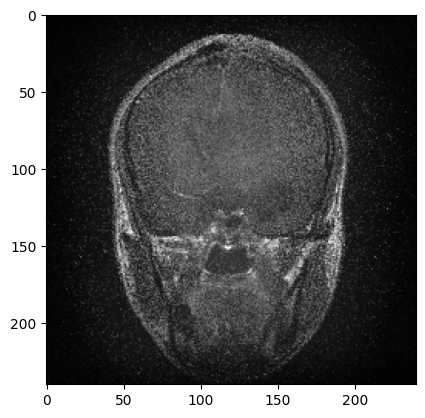

In [22]:
#Bilateral, TV and Wavelet
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import img_as_float



denoise_bilateral = denoise_bilateral(img_noisy, sigma_spatial=15,
                multichannel=False)

plt.imshow(denoise_bilateral, cmap='gray')
bilateral_cleaned_psnr = peak_signal_noise_ratio(Img, denoise_bilateral)
plt.imshow
print("PSNR of cleaned image = ", bilateral_cleaned_psnr)
print("SSIM of cleaned image = ", ssim(Img, denoise_bilateral))


<ipython-input-23-a5b7513f3858>:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_TV = denoise_tv_chambolle(img_noisy, weight=0.3, multichannel=False)
<ipython-input-23-a5b7513f3858>:9: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  TV_cleaned_psnr = peak_signal_noise_ratio(Img, denoise_TV)


PSNR of cleaned image =  25.16447215353252
SSIM of cleaned image =  0.5939567628326718


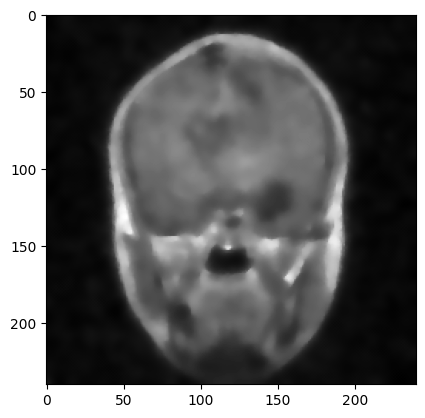

In [23]:
# ###### TV ###############

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import img_as_float

denoise_TV = denoise_tv_chambolle(img_noisy, weight=0.3, multichannel=False)
plt.imshow(denoise_TV, cmap='gray')
TV_cleaned_psnr = peak_signal_noise_ratio(Img, denoise_TV)
print("PSNR of cleaned image = ", TV_cleaned_psnr)
print("SSIM of cleaned image = ", ssim(Img, denoise_TV))

<ipython-input-24-41a4f2a0f859>:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  wavelet_smoothed = denoise_wavelet(img_noisy, multichannel=False,
<ipython-input-24-41a4f2a0f859>:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  Wavelet_cleaned_psnr = peak_signal_noise_ratio(Img, wavelet_smoothed)


PSNR of cleaned image =  26.554369674446086
SSIM of cleaned image =  0.6212634489685079


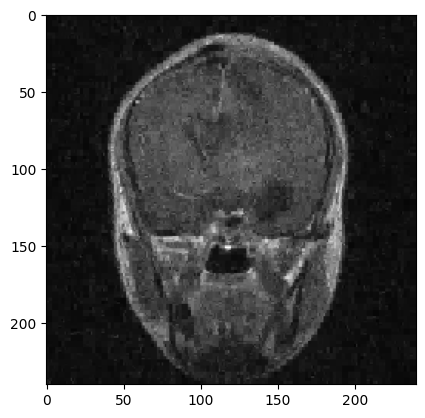

In [24]:
####Wavelet #################
wavelet_smoothed = denoise_wavelet(img_noisy, multichannel=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
plt.imshow(wavelet_smoothed, cmap='gray')
Wavelet_cleaned_psnr = peak_signal_noise_ratio(Img, wavelet_smoothed)
print("PSNR of cleaned image = ", Wavelet_cleaned_psnr)
print("SSIM of cleaned image = ", ssim(Img, wavelet_smoothed))

<ipython-input-25-812efd12f3e8>:13: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(img_noisy, multichannel=False))
<ipython-input-25-812efd12f3e8>:16: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  NLM_skimg_denoise_img = denoise_nl_means(img_noisy, h=1.15 * sigma_est, fast_mode=True,
<ipython-input-25-812efd12f3e8>:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(Img, NLM_skimg_denoise_img)


PSNR of cleaned image =  27.79681740015406
SSIM of cleaned image =  0.6693014465748667


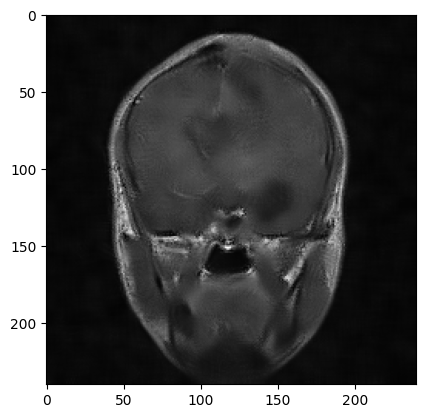

In [25]:
#NLM from SKIMAGE

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
from skimage.metrics import peak_signal_noise_ratio




sigma_est = np.mean(estimate_sigma(img_noisy, multichannel=False))


NLM_skimg_denoise_img = denoise_nl_means(img_noisy, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=9, patch_distance=5, multichannel=False)


NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(Img, NLM_skimg_denoise_img)



plt.imshow(NLM_skimg_denoise_img, cmap='gray')
print("PSNR of cleaned image = ", NLM_skimg_cleaned_psnr)
print("SSIM of cleaned image = ", ssim(Img, NLM_skimg_denoise_img))


In [26]:
pip install bm3d

<ipython-input-30-323d623085c2>:10: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  BM3D_cleaned_psnr = peak_signal_noise_ratio(Img, BM3D_denoised_image)


PSNR of cleaned image =  26.799610717764498
SSIM of cleaned image =  0.6468715299742998


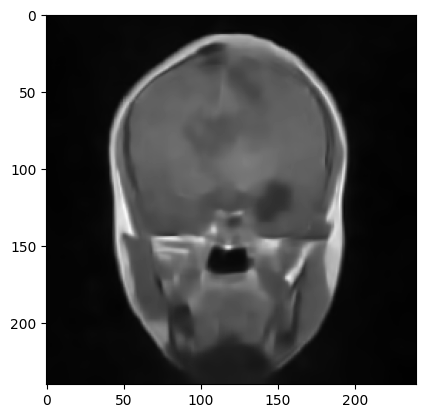

In [30]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio
import bm3d
import numpy as np


BM3D_denoised_image = bm3d.bm3d(img_noisy, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

BM3D_cleaned_psnr = peak_signal_noise_ratio(Img, BM3D_denoised_image)
print("PSNR of cleaned image = ", BM3D_cleaned_psnr)


plt.imshow(BM3D_denoised_image, cmap='gray')
print("SSIM of cleaned image = ", ssim(Img, BM3D_denoised_image))
